In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install tensorflow

In [3]:
import tensorflow as tf

In [4]:
df=pd.read_csv("telecom_churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.drop("customerID",axis=1,inplace=True)

In [9]:
df.value_counts("TotalCharges")

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
260.8       1
260.7       1
2599.95     1
2598.95     1
999.9       1
Length: 6531, dtype: int64

In [10]:
df["TotalCharges"].replace(' ',np.nan,inplace=True)

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [13]:
m=df["TotalCharges"].mean()
df["TotalCharges"].fillna(m,inplace=True)

In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#Check whather it is balanced or unbalanced
#We wan to predict customer will left the service or nor not means predict

In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
!pip install imblearn

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes(["Float64","int64"])

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in df_cat:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

C:\Users\DELL\AppData\Local\Temp/ipykernel_13836/4248682089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col]=le.fit_transform(df_cat[col])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
df = pd.concat([df_num,df_cat],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
X=df.drop("Churn",axis=1) #input variable
Y=df["Churn"] #output means target

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [28]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros=RandomOverSampler(random_state=1)

In [31]:
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [32]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [33]:
pd.Series(Y_train1).value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [34]:
#Neural Network

In [35]:
import tensorflow as tf
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(units=64,activation='relu',
                                                input_shape=(X.shape[1],)),
                            tf.keras.layers.Dense(units=64,activation='relu'),
                            tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Training Dataset: The sample of data used to fit the model.
#The actual dataset that we use to train the model 
#(weights and biases in the case of a Neural Network). 
#The model sees and learns from this data.


#Validation Dataset: The sample of data used to provide an unbiased evaluation of a model
#fit on the training dataset while tuning model hyperparameters.
#The validation set is used to evaluate a given model,
#but this is for frequent evaluation. 
#We, as machine learning engineers, use this data to fine-tune the model hyperparameters.
#Hence the model occasionally sees this data, but never does it “Learn” from this.
#We use the validation set results, and update higher level hyperparameters.
#So the validation set affects a model, but only indirectly. 
#The validation set is also known as the Dev set or the Development set. 
#This makes sense since this dataset helps during the “development” stage of the model.
#hperparameter are kernel,cv,n_neighbours,k etc
#One of the major reasons we need a validation set is to ensure that our model is not overfitting to the data
#in the training set. 
#We'll discuss overfitting and underfitting in detail at a later time. 
#But the idea of overfitting is that our model becomes really good at being able to classify data in the training set,
#but it's unable to generalize and make accurate classifications on data that it wasn't trained on.
#During training, if we're also validating the model on the validation set and see that the results it's
#giving for the validation data are just as good as the results it's giving for the training data,
#then we can be more confident that our model is not overfitting.


In [38]:
trained_model1=model.fit(X_train1,Y_train1,epochs=100,batch_size=32,validation_data=(X_test1,Y_test1))

Epoch 1/100
225/225 [==============================] - 2s 4ms/step - loss: 0.5214 - accuracy: 0.7353 - val_loss: 0.4796 - val_accuracy: 0.7703
Epoch 2/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4844 - accuracy: 0.7594 - val_loss: 0.4752 - val_accuracy: 0.7779
Epoch 3/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.7728 - val_loss: 0.4784 - val_accuracy: 0.7710
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7774 - val_loss: 0.4804 - val_accuracy: 0.7748
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4570 - accuracy: 0.7857 - val_loss: 0.4846 - val_accuracy: 0.7735
Epoch 6/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.7846 - val_loss: 0.4798 - val_accuracy: 0.7760
Epoch 7/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.7914 - val_loss: 0.4817 - val_accuracy: 0.7694

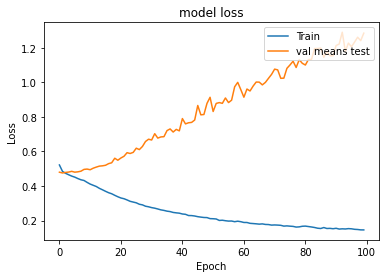

In [39]:
import matplotlib.pyplot as plt
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val means test'], loc='upper right')   #loc means location
plt.show()

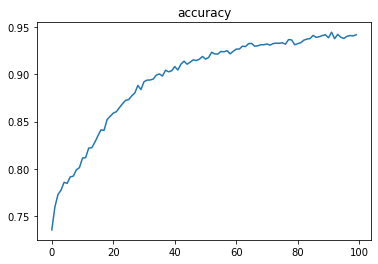

In [40]:
plt.plot(trained_model1.history['accuracy'])
plt.title("accuracy")
plt.show()

In [41]:
#check loss and score 
model.evaluate(X_train1,Y_train1)

225/225 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9466


[0.13995470106601715, 0.9466425180435181]

In [42]:
model.evaluate(X_test1,Y_test1)

100/100 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.6912


[1.2839103937149048, 0.6911671757698059]

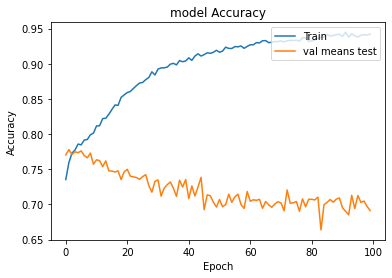

In [43]:
import matplotlib.pyplot as plt
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val means test'], loc='upper right')   #loc means location
plt.show()

In [44]:
#Here model is overfit we apply regularization at training time 
#Means add external error at trainng time 
#Here traning score > testing score (model is overfit)
from keras import regularizers
import tensorflow as tf
model2=tf.keras.Sequential([
                            tf.keras.layers.Dense(units=64,activation='relu',
                                                  kernel_regularizer=regularizers.l2(0.01),
                                                  input_shape=(X.shape[1],)),
                            tf.keras.layers.Dense(units=64,activation='relu',
                            kernel_regularizer=regularizers.l2(0.01),),
                                                   
                            tf.keras.layers.Dense(units=1,activation='sigmoid',
                            kernel_regularizer=regularizers.l2(0.01),)
])

In [45]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
trained_model2=model2.fit(X_train1,Y_train1,epochs=100,batch_size=32,validation_data=(X_test1,Y_test1))

Epoch 1/100
225/225 [==============================] - 2s 3ms/step - loss: 1.0032 - accuracy: 0.7414 - val_loss: 0.6838 - val_accuracy: 0.7707
Epoch 2/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6300 - accuracy: 0.7604 - val_loss: 0.5654 - val_accuracy: 0.7735
Epoch 3/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7615 - val_loss: 0.5388 - val_accuracy: 0.7801
Epoch 4/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7630 - val_loss: 0.5340 - val_accuracy: 0.7719
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5441 - accuracy: 0.7612 - val_loss: 0.5268 - val_accuracy: 0.7735
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7625 - val_loss: 0.5307 - val_accuracy: 0.7719
Epoch 7/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7626 - val_loss: 0.5187 - val_accuracy: 0.7751

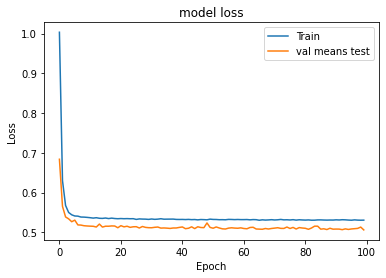

In [47]:
import matplotlib.pyplot as plt
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val means test'], loc='upper right')   #loc means location
plt.show()

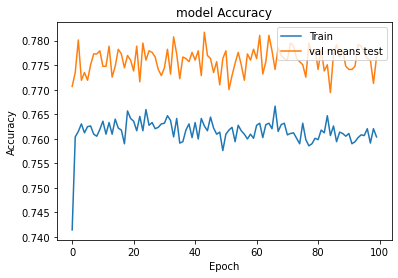

In [48]:
import matplotlib.pyplot as plt
plt.plot(trained_model2.history['accuracy'])
plt.plot(trained_model2.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val means test'], loc='upper right')   #loc means location
plt.show()

In [49]:
#check loss and score 
model2.evaluate(X_train1,Y_train1)

225/225 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7629


[0.5282337665557861, 0.7628865838050842]

In [50]:
model2.evaluate(X_test1,Y_test1)

100/100 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7767


[0.506155252456665, 0.7766561508178711]

In [51]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [52]:
Y_pred=model2.predict(X_test1)
Y_pred=np.where(Y_pred>=0.5,1,0)

In [53]:
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170



In [54]:
print(confusion_matrix(Y_test1,Y_pred))

[[1196  389]
 [ 319 1266]]
